In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("resnet18_3d_seg.csv")
df

,train_loss,val_loss,fbeta_0.20,fbeta_0.25,fbeta_0.30,fbeta_0.35,fbeta_0.40,fbeta_0.45,fbeta_0.50,fbeta_0.55,fbeta_0.60,fbeta_0.65,fbeta_0.70,fbeta_0.75,fbeta_0.80,fbeta_0.85,fbeta_0.90,fbeta_0.95,epoch
0,0.711181,0.721754,0.160918,0.160918,0.160918,0.160918,0.160919,0.164441,0.114808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,0.713684,0.694771,0.160863,0.160863,0.160868,0.161040,0.194844,0.240344,0.138078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
2,0.710001,0.654475,0.160954,0.191016,0.206483,0.223436,0.242037,0.254846,0.223472,0.039638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
3,0.715303,0.646460,0.168277,0.207460,0.226489,0.239651,0.252701,0.259329,0.255684,0.244613,0.040285,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
4,0.709877,0.638297,0.201160,0.215157,0.226844,0.238087,0.246635,0.253602,0.259329,0.251691,0.090475,0.000134,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.411805,0.620249,0.393817,0.381206,0.372081,0.365243,0.359270,0.352100,0.342342,0.331811,0.320406,0.307414,0.289596,0.266937,0.241763,0.209076,0.167239,0.097009,198
198,0.406501,0.497918,0.436769,0.444218,0.449384,0.453285,0.456817,0.459868,0.462408,0.465378,0.467190,0.469059,0.469773,0.468708,0.466030,0.459277,0.440670,0.392297,199
199,0.417769,0.658744,0.200986,0.200018,0.199233,0.198951,0.199269,0.200390,0.202336,0.205276,0.208134,0.215197,0.239668,0.388528,0.355171,0.310223,0.243947,0.151676,200
200,0.410258,0.456297,0.422544,0.440895,0.456174,0.466522,0.474632,0.482034,0.487047,0.492663,0.499917,0.506216,0.511857,0.515457,0.518140,0.517586,0.508422,0.454628,201


(0.35, 0.65)

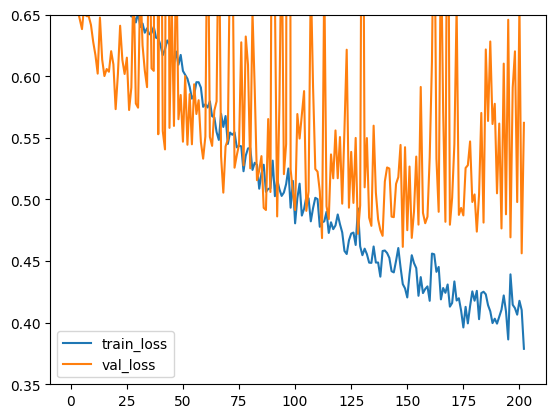

In [14]:
plt.plot(df["epoch"], df["train_loss"], label="train_loss")
plt.plot(df["epoch"], df["val_loss"], label="val_loss")
# plot the moving average of the validation loss
# plt.plot(df["epoch"], df["val_loss"].rolling(20).mean(), label="val_loss")

plt.legend()
plt.ylim(0.35, 0.65)

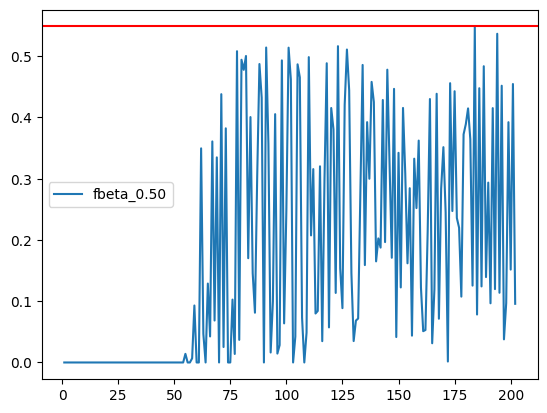

In [3]:
plt.plot(df["epoch"], df["fbeta_0.95"], label="fbeta_0.50")
# plt.plot(df["epoch"], df["fbeta_0.95"].rolling(20).mean(), label="fbeta_0.50")


# set horizontal line at 0.5486
plt.axhline(y=0.5486, color='r', linestyle='-')

plt.legend()
# plt.ylim(0.4, 1)


(202, 16)


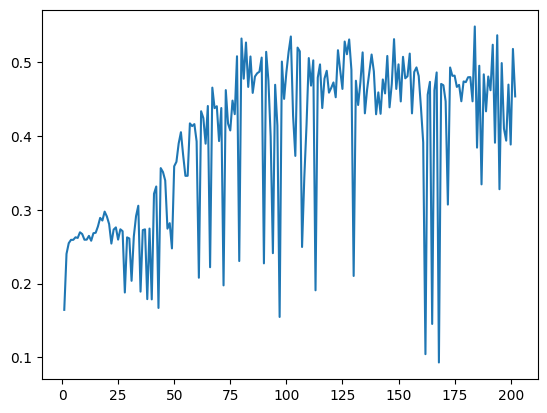

In [4]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
print(df_fbeta.shape)
df_fbeta = np.max(df_fbeta, axis=1)
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")

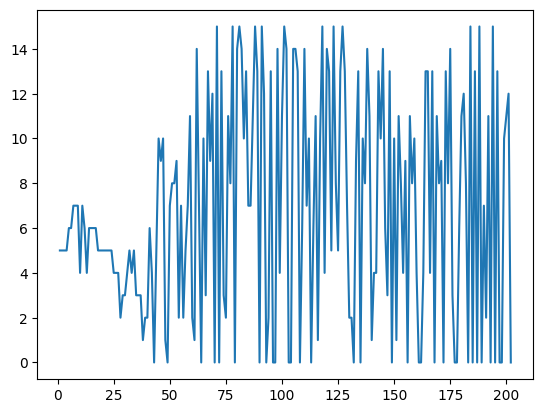

In [5]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
df_fbeta = np.argmax(df_fbeta, axis=1)
df_fbeta.shape
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")

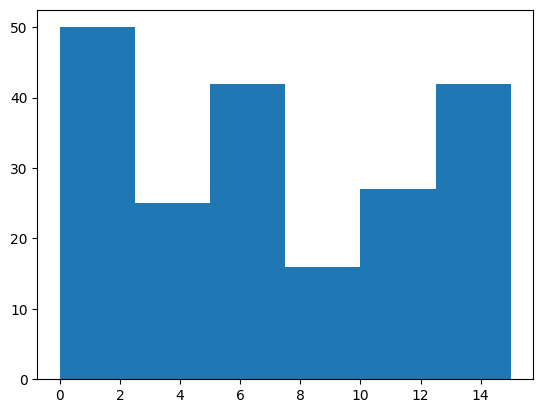

In [6]:
plt.hist(df_fbeta, bins=6);